# Kostiuk Ihor 255195

### Złożony Proces Poissona

Złożony proces Poissona ${ X t } t ⩾ 0 {\displaystyle \{X_{t}\}_{t\geqslant 0}}$ zadany parametrem λ ∈ R + ${\displaystyle \lambda \in \mathbb {R} _{+}}$ oraz funkcją gęstości prawdopodobieństwa $f {\displaystyle f}$ ma dla dowolnego $t ⩾ 0 {\displaystyle t\geqslant 0}$ postać: $X t = ∑ i = 1 N t Y i, {\displaystyle X_{t}=\sum _{i=1}^{N_{t}}Y_{i},}$ gdzie:
zmienne $Y 1, Y 2, … {\displaystyle Y_{1},Y_{2},\dots }$ są również niezależne z danym procesem Poissona.
${ N t } t ⩾ 0 {\displaystyle \{N_{t}\}_{t\geqslant 0}}$ jest procesem Poissona o parametrze λ, ${\displaystyle \lambda,}$
$Y 1, Y 2, … {\displaystyle Y_{1},Y_{2},\dots }$ są niezależnymi zmiennymi o takich samym rozkładzie danym gęstością $f, {\displaystyle f,}$

Jeżeli ${ X t } t ⩾ 0 {\displaystyle \{X_{t}\}_{t\geqslant 0}}$ jest złożonym procesem Poissona, ma następujące własności:
wariancja w chwili $t {\displaystyle t}$ wynosi: $D 2 X t = λ t E Y 1 2, {\displaystyle D^{2}X_{t}=\lambda tEY_{1}^{2},}$
funkcja charakterystyczna w chwili $t {\displaystyle t}$ wynosi
wartość oczekiwana w chwili $t {\displaystyle t}$ wynosi: $E X t = λ t E Y 1, {\displaystyle EX_{t}=\lambda tEY_{1},}$
dla każdego ω ${\displaystyle \omega }$ funkcja $t ↦ X t ω {\displaystyle t\mapsto X_{t}\omega}$ jest przedziałami stała i prawostronnie ciągła

### Proces Wienera

Procesem Wienera (ruchem Browna) nazywamy proces stochastyczny $W=(W_{{t}})_{{t\geq 0}}$ taki, że

$\displaystyle W_{{0}}=0\mbox{ p.n.}$;	
$\displaystyle W\mbox{ ma przyrosty niezależne};$	
$\displaystyle\mbox{Dla $0\leq s<t$ zmienna $W_{{t}}-W_{{s}}$ ma rozkład normalny
${\mathcal{N}}(0,t-s)$}$;	
Trajektorie W są ciągłe z prawdopodobieństwem 1.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def generuj_skok_weiner(old_skok, dt):
    """
    Funkcja do generacji skoków procesu Wienera
    """
    return old_skok + np.sqrt(dt) * np.random.normal(0,1)

def generuj_skok_comb_poiss(old_skok, **kwargs):
    """
    Funkcja do generowania skoów złożonego procesu Poissona
    """
    params = kwargs
    rozklad = params.pop('rozklad', None)
    return old_skok + rozklad(**kwargs)

In [11]:
generuj_skok_comb_poiss(0, rozklad = np.random.uniform, low = 0, high = 1)

0.7169814781686841

In [40]:
generuj_skok_comb_poiss(0, rozklad = np.random.gamma, shape = 2, scale = 2)

6.4980946685719765

In [287]:
class Stochastic_process():
    """
    Klasa dla N wymiarowych procesów stochastycznych
    
    Parametry:
        skok_funk (func): funkcja do generowania skoków
        n_wymiarów (int): wymiarowość procesu stochastycznego 
    
    Atrybuty:
        skok_funk (func): funkcja do generowania skoków
        n_wymiarów (int): wymiarowość procesu stochastycznego
        macierz_skoki (np.array): macierz ze skokami w każdej chwili T
        T (int): ostatnia chwila na której process się zatrzymał
        perwszy_skok_bool (bool): wartość logiczna, pokazuje czy odbył się pierwsz skok
    
    """
    def __init__(self, skok_funk, n_wymiarow =1):
        self.skok_funk = skok_funk
        self.n_wymiarow = n_wymiarow
        #self.dt = dt
        self.macierz_skoki = np.zeros((self.n_wymiarow, 1))
        self.T = len(self.macierz_skoki[0])
        self.perwszy_skok_bool = True
        
    def pierwszy_skok(self):
        """
        metoda do zrobienia pierwszego skoku przez process stochastyczny 
        """
        self.perwszy_skok_bool = False
        for i in range(self.n_wymiarow):
            self.macierz_skoki[i,0] = self.skok_funk(0, **self.param)
        return self.macierz_skoki
    
    def wyjdz_z_kuli(self, kula_radius = 1):
        """
        Metoda do generowania procesó stochastycznego w granicach kuli z radiusom kula_radius
        Po wyjciu za granicy kuli process zatrzymuję się
        """
        self.macierz_skoki = np.zeros((self.n_wymiarow, 1))
        
        if self.perwszy_skok_bool:
            self.pierwszy_skok()
        
        j = 0
        while True:
            skokn = []
            for i in range(self.n_wymiarow):
                skokn.append(self.skok_funk(self.macierz_skoki[i,j-1], **self.param))

            skokn = np.array(skokn).reshape((self.n_wymiarow, 1))
            self.macierz_skoki = np.append(self.macierz_skoki, skokn, axis=1)
            j += 1
            self.T = len(self.macierz_skoki[0])
            #print(self.macierz_skoki[:,-1])
            if any(abs(self.macierz_skoki[:,-1]) > kula_radius):
                break
        return self.macierz_skoki
    
    def check_out_cube(self, kostka = ((0,1),(0,1))):
        """
        Metoda do sprawdzenia, czy process znajduje się w granicach kostki
        """
        
        if self.perwszy_skok_bool:
            raise Exception('process jeszcze nie startował, zrób pierwszy skok')
            
        ostatni_skok = self.macierz_skoki[:,-1]
        w_granicach = []
        
        for i in range(len(kostka)):
            w_granicach.append(ostatni_skok[i] < kostka[i][0] or ostatni_skok[i] > kostka[i][1])
        return any(w_granicach)
        
        
    def wyjdz_z_kostki(self, kostka = ((0,1),(0,1))):
        """
        Metoda do generowania procesó stochastycznego w granicach kostki z radiusom kula_radius
        Po wyjciu za granicy kostki process zatrzymuję się
        """
        if len(kostka) != self.n_wymiarow:
            raise Exception('wymiary kostki i procesu się nie zgadzają')
        
        self.macierz_skoki = np.zeros((self.n_wymiarow, 1))
        
        if self.perwszy_skok_bool:
            self.pierwszy_skok()
        
        j = 0
        while True:
            skokn = []
            for i in range(self.n_wymiarow):
                skokn.append(self.skok_funk(self.macierz_skoki[i,j-1], **self.param))

            skokn = np.array(skokn).reshape((self.n_wymiarow, 1))
            self.macierz_skoki = np.append(self.macierz_skoki, skokn, axis=1)
            j += 1
            self.T = len(self.macierz_skoki[0])
            if self.check_out_cube(kostka = kostka):
                break
        return self.macierz_skoki
    
    def check_in_sphere(self, kula_centrum = (0,0), kula_radius = 1):
        """
        Metoda do sprawdzenia, czy process znajduje się w granicach kuli
        """
        if self.perwszy_skok_bool:
            raise Exception('process jeszcze nie startował, zrób pierwszy skok')
        
        suma = 0
        ostatni_skok = self.macierz_skoki[:,-1]
        
        for i in range(len(kula_centrum)):
            suma += (ostatni_skok[i] - kula_centrum[i])**2
            
        return suma < kula_radius**2
    
    def traf_w_kule(self, kula_centrum = (3,3), kula_radius = 1, 
                    limit_skokow = True, n_skok = 1000):
        """
        Metoda do sprawdzenia za jaki czas process trafi w kulę
        """
        if self.perwszy_skok_bool:
            self.pierwszy_skok()
        
        self.macierz_skoki = np.zeros((self.n_wymiarow, 1))
        
        if len(kula_centrum) != self.n_wymiarow:
            raise Exception('wymiary kuli i procesu się nie zgadzają')
        
        j = 0
        while True:
            skokn = []
            for i in range(self.n_wymiarow):
                skokn.append(self.skok_funk(self.macierz_skoki[i,j-1], **self.param))

            skokn = np.array(skokn).reshape((self.n_wymiarow, 1))
            self.macierz_skoki = np.append(self.macierz_skoki, skokn, axis=1)
            j += 1
            self.T = len(self.macierz_skoki[0])
            
            if self.check_in_sphere(kula_centrum = kula_centrum, kula_radius = kula_radius):
                break
            
            elif limit_skokow and j > n_skok:

                #print('osiągniento limitu skoków: {}'.format(n_skok))
                break
            
        return self.macierz_skoki
    
    
class Wiener_process(Stochastic_process):
    """
    Klasa dla procesu Wienera
    
    Parametry:
        skok_funk (func): funkcja do generowania skoków
        n_wymiarów (int): wymiarowość procesu stochastycznego 
        **kwargs: parametry ze słowem kluczowym
    """
    def __init__(self, skok_funk, n_wymiarow =1, **kwargs):#dt = 10**(-4)):
        super().__init__(skok_funk = skok_funk, n_wymiarow = n_wymiarow)
        self.param = kwargs
        
    def generuj_n_skokow(self, n_skok = 100):
        """
        Metoda do stworzenia N pierwszych skoków przez process
        
        Parametry:
            n_skok (int): liczba skoków do zrobienia
            
        Zwraca:
            np.array: process po n_skok skoku
        """
        if self.perwszy_skok_bool:
            self.pierwszy_skok()
        
        j = 0
        while True:
        #for j in range(1, n_skok):
            skokn = []
            for i in range(self.n_wymiarow):
                skokn.append(self.skok_funk(self.macierz_skoki[i,j-1], **self.param))

            skokn = np.array(skokn).reshape((self.n_wymiarow, 1))
            self.macierz_skoki = np.append(self.macierz_skoki, skokn, axis=1)
            self.T = len(self.macierz_skoki[0])
            j += 1
            
            if j>n_skok:
                break
        return self.macierz_skoki
    
class Combiend_Poisson(Stochastic_process):
    """
    Klasa dla złożonego procesu Poissona
    Parametry:
        skok_funk (func): funkcja do generowania skoków
        n_wymiarów (int): wymiarowość procesu stochastycznego
        lambd (float): parametr do procesu Poissona
        **kwargs: parametry ze słowem kluczowym
        
    Atrybuty:
        lambd (float): parametr do procesu Poissona
        time1 (float): czasy skoków
        param (dict): słownik z parametrami do generacji zmiennych losowych
    """
    
    def __init__(self, skok_funk, n_wymiarow =1, lambd = 1, **kwargs):
        super().__init__(skok_funk = skok_funk, n_wymiarow = n_wymiarow)
        self.lambd = lambd
        self.time1 = [0]
        self.param = kwargs
        
        
    def generuj_n_skokow(self, n_skok = 100):
        """
        Metoda do stworzenia N pierwszych skoków przez process
        
        Parametry:
            n_skok (int): czas trwania procesu
            
        Zwraca:
            np.array: process po chwili n_skok skoku
        """
        if self.perwszy_skok_bool:
            self.pierwszy_skok()
        
        j = 0
        while True:
        #for j in range(1, n_skok):
            skokn = []
            for i in range(self.n_wymiarow):
                skokn.append(self.skok_funk(self.macierz_skoki[i,j-1], **self.param))

            skokn = np.array(skokn).reshape((self.n_wymiarow, 1))
            self.macierz_skoki = np.append(self.macierz_skoki, skokn, axis=1)
            self.T = len(self.macierz_skoki[0])
            j += 1

            self.time1.append(self.time1[-1] - 1/self.lambd*(np.log(np.random.uniform(0,1))))
            
            if self.time1[-1]>n_skok:
                break
        return self.macierz_skoki

## Złożony Proces Poissona ze skokami z rozkładu Jednorodnego

In [99]:
poiss_process = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 2, 
                                 rozklad = np.random.uniform, low = 0, high=1)

In [100]:
poiss_process.__dict__

{'skok_funk': <function __main__.generuj_skok_comb_poiss(old_skok, **kwargs)>,
 'n_wymiarow': 2,
 'macierz_skoki': array([[0.],
        [0.]]),
 'T': 1,
 'perwszy_skok_bool': True,
 'lambd': 1,
 'time1': [0],
 'param': {'rozklad': <function RandomState.uniform>, 'low': 0, 'high': 1}}

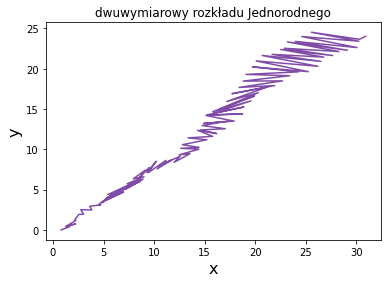

In [129]:
b = poiss_process.generuj_n_skokow(n_skok=100)
plt.plot(b[0],b[1],zorder=2,color="indigo",alpha=0.7)
plt.title('dwuwymiarowy rozkładu Jednorodnego')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [102]:
poiss_process1 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 1, 
                                 rozklad = np.random.uniform, low = -1, high=1)

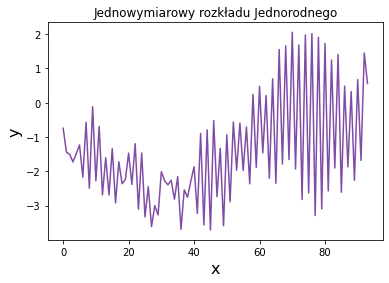

In [128]:
a = poiss_process1.generuj_n_skokow(n_skok=100)
plt.plot(a[0],zorder=2,color="indigo",alpha=0.7)
plt.title('Jednowymiarowy rozkładu Jednorodnego')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [105]:
poiss_process3 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 3, 
                                 rozklad = np.random.uniform, low = 0, high=1)

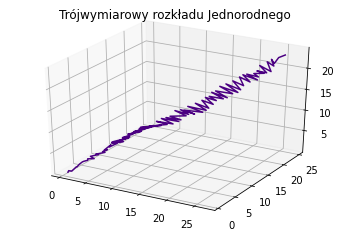

In [127]:
fig = plt.figure()
ax = plt.axes(projection="3d")

c = poiss_process3.generuj_n_skokow(n_skok=100)
ax.plot3D(c[0],c[1], c[2], 'indigo')
plt.title('Trójwymiarowy rozkładu Jednorodnego')

plt.show()

## Złożony Proces Poissona ze skokami z rozkładu Gamma

In [62]:
poiss_process4 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 1, 
                                 rozklad = np.random.gamma, shape = 2, scale = 2)

In [63]:
poiss_process4.__dict__

{'skok_funk': <function __main__.generuj_skok_comb_poiss(old_skok, **kwargs)>,
 'n_wymiarow': 1,
 'macierz_skoki': array([[0.]]),
 'T': 1,
 'perwszy_skok_bool': True,
 'lambd': 1,
 'time1': [0],
 'param': {'rozklad': <function RandomState.gamma>, 'shape': 2, 'scale': 2}}

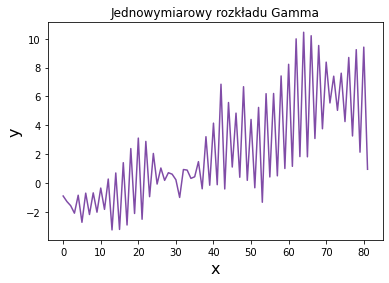

In [126]:
d = poiss_process4.generuj_n_skokow(n_skok=100)
plt.plot(d[0],zorder=2,color="indigo",alpha=0.7)
plt.title('Jednowymiarowy rozkładu Gamma')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [68]:
poiss_process5 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 2, 
                                 rozklad = np.random.gamma, shape = 2, scale = 2)

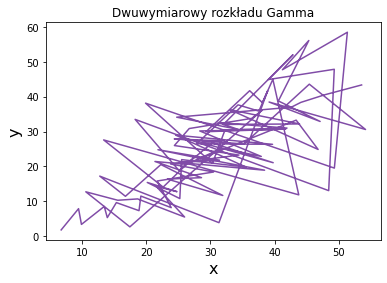

In [125]:
e = poiss_process5.generuj_n_skokow(n_skok=100)
plt.plot(e[0],e[1],zorder=2,color="indigo",alpha=0.7)
plt.title('Dwuwymiarowy rozkładu Gamma')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [76]:
poiss_process5 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 3, 
                                 rozklad = np.random.gamma, shape = 2, scale = 2)

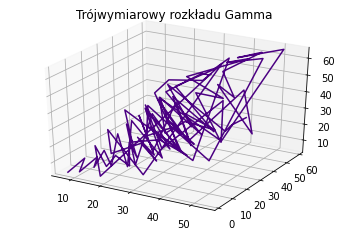

In [124]:
fig = plt.figure()
ax = plt.axes(projection="3d")

g = poiss_process5.generuj_n_skokow(n_skok=100)
ax.plot3D(g[0],g[1], g[2], 'indigo')
plt.title('Trójwymiarowy rozkładu Gamma')

plt.show()

## Złożony Proces Poissona ze skokami z rozkładu Normalnego

In [109]:
poiss_process6 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 1, 
                                 rozklad = np.random.normal, loc=0.0, scale=1.0)

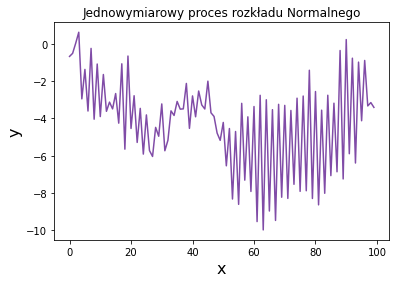

In [111]:
h = poiss_process6.generuj_n_skokow(n_skok=100)
plt.plot(h[0],zorder=2,color="indigo",alpha=0.7)
plt.title('Jednowymiarowy proces rozkładu Normalnego')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [113]:
poiss_process7 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 2, 
                                 rozklad = np.random.normal, loc=0.0, scale=1.0)

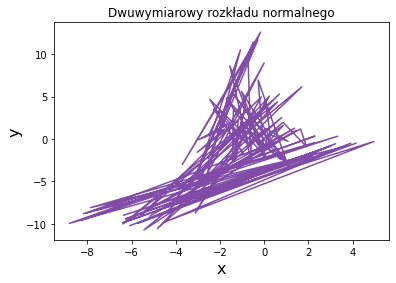

In [115]:
j = poiss_process7.generuj_n_skokow(n_skok=100)
plt.plot(j[0],j[1],zorder=2,color="indigo",alpha=0.7)
plt.title('Dwuwymiarowy rozkładu normalnego')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [121]:
poiss_process8 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 3, 
                                 rozklad = np.random.normal, loc=0.0, scale=1.0)

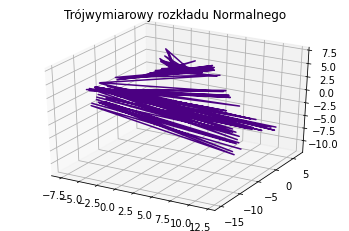

In [123]:
fig = plt.figure()
ax = plt.axes(projection="3d")

q = poiss_process8.generuj_n_skokow(n_skok=100)
ax.plot3D(q[0],q[1], q[2], 'indigo')
plt.title('Trójwymiarowy rozkładu Normalnego')

plt.show()

## Proces Weinera dla dt = 10^-4

In [130]:
weiner_process = Wiener_process(generuj_skok_weiner, n_wymiarow = 2, dt = 10**(-4))

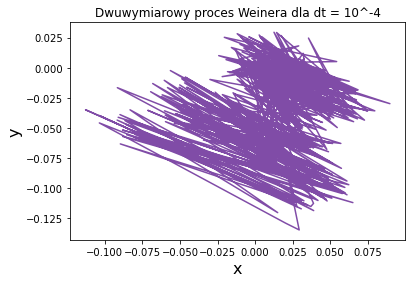

In [135]:
k = weiner_process.generuj_n_skokow(n_skok=100)
plt.plot(k[0],k[1],zorder=2,color="indigo",alpha=0.7)
plt.title('Dwuwymiarowy proces Weinera dla dt = 10^-4')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [154]:
weiner_process1 = Wiener_process(generuj_skok_weiner, n_wymiarow = 1, dt = 10**(-4))

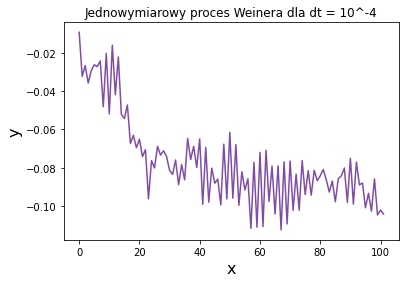

In [156]:
l = weiner_process1.generuj_n_skokow(n_skok=100)
plt.plot(l[0],zorder=2,color="indigo",alpha=0.7)
plt.title('Jednowymiarowy proces Weinera dla dt = 10^-4')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [142]:
weiner_process2 = Wiener_process(generuj_skok_weiner, n_wymiarow = 3, dt = 10**(-4))

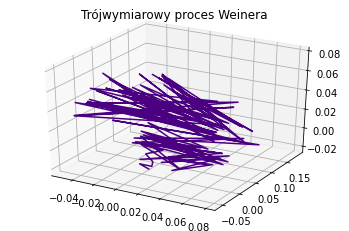

In [146]:
fig = plt.figure()
ax = plt.axes(projection="3d")

w = weiner_process2.generuj_n_skokow(n_skok=100)
ax.plot3D(w[0],w[1], w[2], 'indigo')
plt.title('Trójwymiarowy proces Weinera')

plt.show()

## Proces Weinera dla dt = 10^-3

In [145]:
weiner_process3 = Wiener_process(generuj_skok_weiner, n_wymiarow = 2, dt = 10**(-3))
weiner_process3.__dict__

{'skok_funk': <function __main__.generuj_skok_weiner(old_skok, dt)>,
 'n_wymiarow': 2,
 'macierz_skoki': array([[0.],
        [0.]]),
 'T': 1,
 'perwszy_skok_bool': True,
 'param': {'dt': 0.001}}

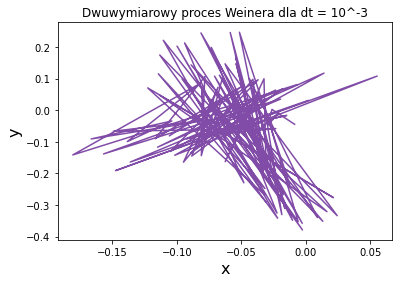

In [147]:
r = weiner_process3.generuj_n_skokow(n_skok=100)
plt.plot(r[0],r[1],zorder=2,color="indigo",alpha=0.7)
plt.title('Dwuwymiarowy proces Weinera dla dt = 10^-3')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [157]:
weiner_process4 = Wiener_process(generuj_skok_weiner, n_wymiarow = 1, dt = 10**(-3))
weiner_process4.__dict__

{'skok_funk': <function __main__.generuj_skok_weiner(old_skok, dt)>,
 'n_wymiarow': 1,
 'macierz_skoki': array([[0.]]),
 'T': 1,
 'perwszy_skok_bool': True,
 'param': {'dt': 0.001}}

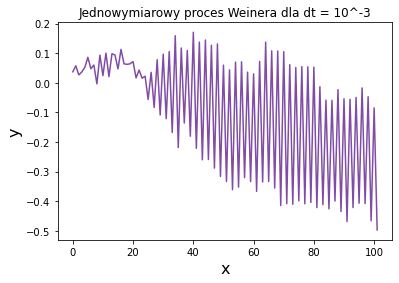

In [158]:
t = weiner_process4.generuj_n_skokow(n_skok=100)
plt.plot(t[0],zorder=2,color="indigo",alpha=0.7)
plt.title('Jednowymiarowy proces Weinera dla dt = 10^-3')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [159]:
weiner_process5 = Wiener_process(generuj_skok_weiner, n_wymiarow = 3, dt = 10**(-3))
weiner_process5.__dict__

{'skok_funk': <function __main__.generuj_skok_weiner(old_skok, dt)>,
 'n_wymiarow': 3,
 'macierz_skoki': array([[0.],
        [0.],
        [0.]]),
 'T': 1,
 'perwszy_skok_bool': True,
 'param': {'dt': 0.001}}

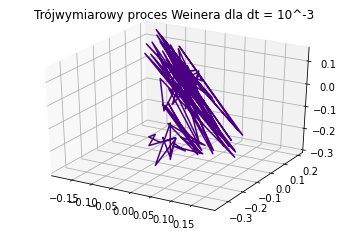

In [160]:
fig = plt.figure()
ax = plt.axes(projection="3d")

u = weiner_process5.generuj_n_skokow(n_skok=100)
ax.plot3D(u[0],u[1], u[2], 'indigo')
plt.title('Trójwymiarowy proces Weinera dla dt = 10^-3')

plt.show()

## Proces Weinera dla dt = 10^-5

In [164]:
weiner_process6 = Wiener_process(generuj_skok_weiner, n_wymiarow = 2, dt = 10**(-5))
weiner_process6.__dict__

{'skok_funk': <function __main__.generuj_skok_weiner(old_skok, dt)>,
 'n_wymiarow': 2,
 'macierz_skoki': array([[0.],
        [0.]]),
 'T': 1,
 'perwszy_skok_bool': True,
 'param': {'dt': 1e-05}}

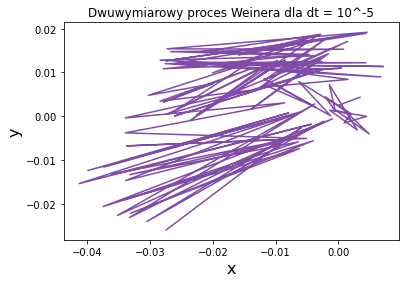

In [165]:
i = weiner_process6.generuj_n_skokow(n_skok=100)
plt.plot(i[0],i[1],zorder=2,color="indigo",alpha=0.7)
plt.title('Dwuwymiarowy proces Weinera dla dt = 10^-5')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [166]:
weiner_process7 = Wiener_process(generuj_skok_weiner, n_wymiarow = 1, dt = 10**(-5))
weiner_process7.__dict__

{'skok_funk': <function __main__.generuj_skok_weiner(old_skok, dt)>,
 'n_wymiarow': 1,
 'macierz_skoki': array([[0.]]),
 'T': 1,
 'perwszy_skok_bool': True,
 'param': {'dt': 1e-05}}

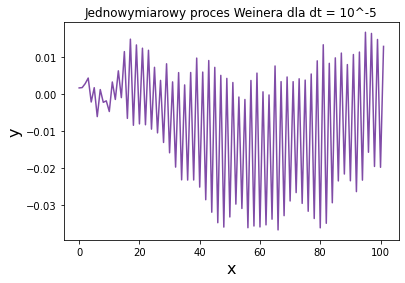

In [167]:
o = weiner_process7.generuj_n_skokow(n_skok=100)
plt.plot(o[0],zorder=2,color="indigo",alpha=0.7)
plt.title('Jednowymiarowy proces Weinera dla dt = 10^-5')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

In [168]:
weiner_process8 = Wiener_process(generuj_skok_weiner, n_wymiarow = 3, dt = 10**(-5))
weiner_process8.__dict__

{'skok_funk': <function __main__.generuj_skok_weiner(old_skok, dt)>,
 'n_wymiarow': 3,
 'macierz_skoki': array([[0.],
        [0.],
        [0.]]),
 'T': 1,
 'perwszy_skok_bool': True,
 'param': {'dt': 1e-05}}

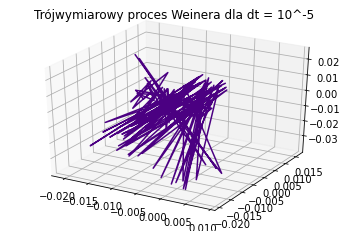

In [169]:
fig = plt.figure()
ax = plt.axes(projection="3d")

p = weiner_process8.generuj_n_skokow(n_skok=100)
ax.plot3D(p[0],p[1], p[2], 'indigo')
plt.title('Trójwymiarowy proces Weinera dla dt = 10^-5')

plt.show()

## Ilość skoków do wyjścia z kuli dla złożonego Procesu Poissona rozkładu Jednorodnego 

n_wymiarow = 1

In [210]:
poiss_process_1 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 1, 
                                 rozklad = np.random.uniform, low = -1, high=1) 


p=[]
for i in range(1000):
    p.append(len(poiss_process_1.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr)    

    

7.329


n_wymiarow = 2

In [216]:
poiss_process_2 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 2, 
                                 rozklad = np.random.uniform, low = -1, high=1) 


p=[]
for i in range(1000):
    p.append(len(poiss_process_2.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr)    



5.404


n_wymiarow = 3

In [217]:
poiss_process_3 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 3, 
                                 rozklad = np.random.uniform, low = -1, high=1) 


p=[]
for i in range(1000):
    p.append(len(poiss_process_3.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr)    



4.745


## Ilość skoków do wyjścia z kuli dla złożonego Procesu Poissona rozkładu Gamma 

n_wymiarow = 1


In [218]:
poiss_process_4 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 1, 
                                 rozklad = np.random.gamma, shape = 2, scale = 2)


p=[]
for i in range(1000):
    p.append(len(poiss_process_4.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr) 

2.117


n_wymiarow = 2

In [219]:
poiss_process_5 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 2, 
                                 rozklad = np.random.gamma, shape = 2, scale = 2)


p=[]
for i in range(1000):
    p.append(len(poiss_process_5.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr) 

2.006


In [215]:
n_wymiarow = 3

In [220]:
poiss_process_6 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 3, 
                                 rozklad = np.random.gamma, shape = 2, scale = 2)


p=[]
for i in range(1000):
    p.append(len(poiss_process_6.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr) 

2.0


## Ilość skoków do wyjścia z kuli dla złożonego Procesu Poissona rozkładu Normalnego 

n_wymiarow = 1

In [222]:
poiss_process_7 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 1, 
                                 rozklad = np.random.normal, loc=0.0, scale=1.0)
p=[]
for i in range(1000):
    p.append(len(poiss_process_7.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr)   

4.042


n_wymiarow = 2

In [224]:
poiss_process_8 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 2, 
                                 rozklad = np.random.normal, loc=0.0, scale=1.0)
p=[]
for i in range(1000):
    p.append(len(poiss_process_8.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr)   

2.854


n_wymiarow = 3

In [225]:
poiss_process_9 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 3, 
                                 rozklad = np.random.normal, loc=0.0, scale=1.0)
p=[]
for i in range(1000):
    p.append(len(poiss_process_9.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr) 

2.481


## Ilość skoków do wyjścia z kuli dla procesu Weinera (dt = 10^-4)

n_wymiarow = 1

In [228]:
weiner_process_1 = Wiener_process(generuj_skok_weiner, n_wymiarow = 1, dt = 10**(-4))
p=[]
for i in range(1000):
    p.append(len(weiner_process_1.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr)   

12451.745


n_wymiarow = 2

In [229]:
weiner_process_2 = Wiener_process(generuj_skok_weiner, n_wymiarow = 2, dt = 10**(-4))
p=[]
for i in range(1000):
    p.append(len(weiner_process_2.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr)   

7800.495


n_wymiarow = 3

In [230]:
weiner_process_3 = Wiener_process(generuj_skok_weiner, n_wymiarow = 3, dt = 10**(-4))
p=[]
for i in range(1000):
    p.append(len(weiner_process_3.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr)   

6017.014


## Ilość skoków do wyjścia z kuli dla procesu Weinera (dt = 10^-3)

n_wymiarow = 1

In [231]:
weiner_process_4 = Wiener_process(generuj_skok_weiner, n_wymiarow = 1, dt = 10**(-3))
p=[]
for i in range(1000):
    p.append(len(weiner_process_4.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr) 

1235.505


n_wymiarow = 2

In [232]:
weiner_process_5 = Wiener_process(generuj_skok_weiner, n_wymiarow = 2, dt = 10**(-3))
p=[]
for i in range(1000):
    p.append(len(weiner_process_5.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr) 

793.386


n_wymiarow = 3

In [233]:
weiner_process_6 = Wiener_process(generuj_skok_weiner, n_wymiarow = 3, dt = 10**(-3))
p=[]
for i in range(1000):
    p.append(len(weiner_process_6.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr) 

625.359


## Ilość skoków do wyjścia z kuli dla procesu Weinera (dt = 10^-5)

n_wymiarow = 1

In [234]:
weiner_process_7 = Wiener_process(generuj_skok_weiner, n_wymiarow = 1, dt = 10**(-2))
p=[]
for i in range(1000):
    p.append(len(weiner_process_7.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr) 

135.504


n_wymiarow = 2

In [235]:
weiner_process_8 = Wiener_process(generuj_skok_weiner, n_wymiarow = 2, dt = 10**(-2))
p=[]
for i in range(1000):
    p.append(len(weiner_process_8.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr) 

85.147


n_wymiarow = 3

In [236]:
weiner_process_9 = Wiener_process(generuj_skok_weiner, n_wymiarow = 3, dt = 10**(-2))
p=[]
for i in range(1000):
    p.append(len(weiner_process_9.wyjdz_z_kuli()[0]))
p_sr = np.mean(p)
print(p_sr) 

69.632


## Ilość skoków do wyjścia z kostki dla złożonego Procesu Poissona rozkładu Jednorodnego 

n_wymiarow = 1

In [256]:
poiss_process_a = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 1, 
                                 rozklad = np.random.uniform, low = -1, high=1) 

p=[]
for i in range(1000):
    p.append(len(poiss_process_a.wyjdz_z_kostki(kostka = [[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr)    



2.996


n_wymiarow = 2

In [257]:
poiss_process_s = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 2, 
                                 rozklad = np.random.uniform, low = -1, high=1) 

p=[]
for i in range(1000):
    p.append(len(poiss_process_s.wyjdz_z_kostki(kostka = [[0,1],[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr)  

2.293


n_wymiarow = 3

In [259]:
poiss_process_d = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 3, 
                                 rozklad = np.random.uniform, low = -1, high=1) 

p=[]
for i in range(1000):
    p.append(len(poiss_process_d.wyjdz_z_kostki(kostka = [[0,1],[0,1],[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr)  

2.144


## Ilość skoków do wyjścia z kostki dla złożonego Procesu Poissona rozkładu Gamma 

n_wymiarow = 1

In [261]:
poiss_process_f = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 1, 
                                 rozklad = np.random.gamma, shape = 2, scale = 2)


p=[]
for i in range(1000):
    p.append(len(poiss_process_f.wyjdz_z_kostki(kostka = [[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr) 

2.085


n_wymiarow = 2

In [262]:
poiss_process_g = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 2, 
                                 rozklad = np.random.gamma, shape = 2, scale = 2)


p=[]
for i in range(1000):
    p.append(len(poiss_process_g.wyjdz_z_kostki(kostka = [[0,1],[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr) 

2.014


n_wymiarow = 3

In [263]:
poiss_process_h = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 3, 
                                 rozklad = np.random.gamma, shape = 2, scale = 2)


p=[]
for i in range(1000):
    p.append(len(poiss_process_h.wyjdz_z_kostki(kostka = [[0,1],[0,1],[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr) 

2.001


## Ilość skoków do wyjścia z kostki dla złożonego Procesu Poissona rozkładu Normalnego 

n_wymiarow = 1

In [264]:
poiss_process_j = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 1, 
                                   rozklad = np.random.normal, loc=0.0, scale=1.0)

p=[]
for i in range(1000):
    p.append(len(poiss_process_f.wyjdz_z_kostki(kostka = [[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr)

2.109


n_wymiarow = 2

In [265]:
poiss_process_k = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 2, 
                                   rozklad = np.random.normal, loc=0.0, scale=1.0)

p=[]
for i in range(1000):
    p.append(len(poiss_process_k.wyjdz_z_kostki(kostka = [[0,1],[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr)

2.125


n_wymiarow = 3

In [266]:
poiss_process_l = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 3, 
                                   rozklad = np.random.normal, loc=0.0, scale=1.0)

p=[]
for i in range(1000):
    p.append(len(poiss_process_l.wyjdz_z_kostki(kostka = [[0,1],[0,1],[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr)

2.046


## Ilość skoków do wyjścia z kostki dla procesu Weinera (dt = 10^-4)

n_wymiarow = 1

In [267]:
weiner_process_a = Wiener_process(generuj_skok_weiner, n_wymiarow = 1, dt = 10**(-4))
p=[]
for i in range(1000):
    p.append(len(weiner_process_a.wyjdz_z_kostki(kostka = [[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr)   

5.599


n_wymiarow = 2

In [269]:
weiner_process_b = Wiener_process(generuj_skok_weiner, n_wymiarow = 2, dt = 10**(-4))
p=[]
for i in range(1000):
    p.append(len(weiner_process_b.wyjdz_z_kostki(kostka = [[0,1],[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr)  

2.541


n_wymiarow = 3

In [270]:
weiner_process_s = Wiener_process(generuj_skok_weiner, n_wymiarow = 3, dt = 10**(-4))
p=[]
for i in range(1000):
    p.append(len(weiner_process_s.wyjdz_z_kostki(kostka = [[0,1],[0,1],[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr) 

2.166


## Ilość skoków do wyjścia z kostki dla procesu Weinera (dt = 10^-3)

n_wymiarow = 1

In [271]:
weiner_process_d = Wiener_process(generuj_skok_weiner, n_wymiarow = 1, dt = 10**(-3))
p=[]
for i in range(1000):
    p.append(len(weiner_process_d.wyjdz_z_kostki(kostka = [[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr)   

7.79


n_wymiarow = 2

In [272]:
weiner_process_f = Wiener_process(generuj_skok_weiner, n_wymiarow = 2, dt = 10**(-3))
p=[]
for i in range(1000):
    p.append(len(weiner_process_f.wyjdz_z_kostki(kostka = [[0,1],[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr) 

2.374


n_wymiarow = 3

In [273]:
weiner_process_g = Wiener_process(generuj_skok_weiner, n_wymiarow = 3, dt = 10**(-3))
p=[]
for i in range(1000):
    p.append(len(weiner_process_g.wyjdz_z_kostki(kostka = [[0,1],[0,1],[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr) 

2.175


## Ilość skoków do wyjścia z kostki dla procesu Weinera (dt = 10^-2)

n_wymiarow = 1

In [275]:
weiner_process_h = Wiener_process(generuj_skok_weiner, n_wymiarow = 1, dt = 10**(-2))
p=[]
for i in range(1000):
    p.append(len(weiner_process_h.wyjdz_z_kostki(kostka = [[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr)

4.691


n_wymiarow = 2

In [276]:
weiner_process_j = Wiener_process(generuj_skok_weiner, n_wymiarow = 2, dt = 10**(-2))
p=[]
for i in range(1000):
    p.append(len(weiner_process_j.wyjdz_z_kostki(kostka = [[0,1],[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr) 

2.459


n_wymiarow = 3

In [277]:
weiner_process_k = Wiener_process(generuj_skok_weiner, n_wymiarow = 3, dt = 10**(-2))
p=[]
for i in range(1000):
    p.append(len(weiner_process_k.wyjdz_z_kostki(kostka = [[0,1],[0,1],[0,1]])[0]))
p_sr = np.mean(p)
print(p_sr) 

2.146


## Prawdopodobieństwo trafienia w zbór dla złożonego Procesu Poissona dla rozkłady Jednorodnego


In [288]:
poiss_process__ = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 2, 
                                 rozklad = np.random.uniform, low = -1, high=1) 

p=0
for i in range(1000):
    a = len(poiss_process__.traf_w_kule()[0])
    if a <= 1000:
        p+=1
print('Prawdopodobieństwo trafienia w zbiór: '+str(p/1000*100)+'%')  

Prawdopodobieństwo trafienia w zbiór:66.2%


## Prawdopodobieństwo trafienia w zbór dla złożonego Procesu Poissona dla rozkłady Gamma

In [290]:
poiss_process__1 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 2, 
                                 rozklad = np.random.gamma, shape = 2, scale = 2)

p=0
for i in range(1000):
    a = len(poiss_process__1.traf_w_kule()[0])
    if a <= 1000:
        p+=1
print('Prawdopodobieństwo trafienia w zbiór: '+str(p/1000*100)+'%') 

Prawdopodobieństwo trafienia w zbiór:17.7%


## Prawdopodobieństwo trafienia w zbór dla złożonego Procesu Poissona dla rozkłady Normalnego

In [291]:
poiss_process__2 = Combiend_Poisson(generuj_skok_comb_poiss, n_wymiarow = 2, 
                                 rozklad = np.random.normal, loc=0.0, scale=1.0)

p=0
for i in range(1000):
    a = len(poiss_process__2.traf_w_kule()[0])
    if a <= 1000:
        p+=1
print('Prawdopodobieństwo trafienia w zbiór: '+str(p/1000*100)+'%') 

Prawdopodobieństwo trafienia w zbiór: 68.60000000000001%


## Prawdopodobieństwo trafienia w zbór dla procesu Weinera dla dt = 0.5

In [293]:
weiner_process__1 = Wiener_process(generuj_skok_weiner, n_wymiarow = 2, dt = 0.5)

p=0
for i in range(1000):
    a = len(weiner_process__1.traf_w_kule()[0])
    if a <= 1000:
        p+=1
print('Prawdopodobieństwo trafienia w zbiór: '+str(p/1000*100)+'%') 

Prawdopodobieństwo trafienia w zbiór: 72.0%


## Prawdopodobieństwo trafienia w zbór dla procesu Weinera dla dt = 0.1

In [294]:
weiner_process__2 = Wiener_process(generuj_skok_weiner, n_wymiarow = 2, dt = 0.1)

p=0
for i in range(1000):
    a = len(weiner_process__2.traf_w_kule()[0])
    if a <= 1000:
        p+=1
print('Prawdopodobieństwo trafienia w zbiór: '+str(p/1000*100)+'%') 

Prawdopodobieństwo trafienia w zbiór: 55.50000000000001%


## Prawdopodobieństwo trafienia w zbór dla procesu Weinera dla dt = 0.01

In [295]:
weiner_process__3 = Wiener_process(generuj_skok_weiner, n_wymiarow = 2, dt = 0.01)

p=0
for i in range(1000):
    a = len(weiner_process__3.traf_w_kule()[0])
    if a <= 1000:
        p+=1
print('Prawdopodobieństwo trafienia w zbiór: '+str(p/1000*100)+'%') 

Prawdopodobieństwo trafienia w zbiór: 12.5%


## Wnioski

W tym sprawozdaniu napisałem kod do impłementowania procesu Weinera oraz złożonego procesu Poissona w $R^n$. \
Sprawdziłem ilość skoków potrzebnych do wyjścia lub trafienia procesu w zbiór. \
Po przeprowadzeniu eksperymentu otrzymałem następującę wyniki: 
1. Proces Weinera potrzebuję więcej czasu do wyjścia z ograniczonego zbioru.
2. Szybkość trafienia lub wyjścia w/z zbiór załeży od parametrów procesu.
3. Proces Weinera zależy od delty: prawdopodobieństwo trafienia w zbiór dla 0.5 = 72%, dla 0.01 = 12.5%.
4. Złożony proces Poissona złeży od rozkładów (proces normalny działa nieco szybciej).
5. Im mniejszy parametr tym więcej czasu potrzebno do trafienia/wyjśćia w/z zbiór.